# Graham Galloway's DH 10 Project
For Digital Humanities 100 with Professor Adam Anderson, Summer 2021
# How true are the claims made by the Recall Chesa Boudin Campaign?
# A look into San Francisco's District Attorney's Office: 2019-Present
Using publicly available data from https://data.sfgov.org/

For my project I am focusing on crime and justice data for the city of San Francisco

# The Backstory:
In late 2019, Chesa Boudin won the race for District Attorney in San Francisco

Boudin supports restorative justice and vowed to fight against mass incarceration

After assuming office on January 8, 2020, Boudin quickly became the subject of criticism

Critics blamed Boudin for what they saw as a rise in crime in the city

They claim the DA is letting crime go unanswered and that the city has become "lawless"

A campaign to recall Boudin emerged based on these claims

As an advocate for restorative justice myself I wanted to test the accuracy of their claims


# The Claims:
1: Crime has increased in San Francisco since Boudin assumed office and it is a less safe place to live than it was before

2: Boudin is letting criminals go free and not pursuing charges

3: San Francisco has been getting more dangerous than other similarly sized cities


# The Methods:
San Francisco has a plethora of publicly available data on crime and policing

To keep things simple for this brief class, I will be focusing on data from the year before Boudin took office and the time since, so January 2019 - June 2021

I have to consider critical crime theory when assessing this data. Questions like "What constitutes a crime?", "Who gets arrested or charged for crimes?", "What do police look for when documenting crime?" will help me better understand the biases that affect this data.

# The Prosecutorial Process:
Going into this project it's very important to describe the difference between the police and the District Attorney.

Here I'll describe the process and steps that go into criminal prosecution. Once a crime is committed (or suspected), usually the police are called. This data is recorded as "Police Department Calls for Service", or "Calls" for the sake of this project. These calls include the location of the crime, a description, and the date and time of the call.

If the police determine a crime was committed, they file an incident report and it is officially documented. I will call these reports simply "Reports". These reports include a description of the crime or crime ID number, the location, the date and time, and whether a perpetrator was confronted or arrested. For many police incidents, no perpetrator is found and no arrests are made.

If an arrest is made, the police are responsible for charging the suspect with a crime, which requires probable cause. The police are then responsible for building a case against the subject, which they present to the District Attorney's office. The District Attorney is then responsible for pursuing these charges and prosecuting the suspect in court. The DA can choose to pursue a case, drop charges, or present the case to a different office (such as a state Attorney General, federal, etc.). An incoming DA inherits incomplete cases from the previous DA. For this reason, there are often more cases presented to a DA than arrests made for a given year.

Once a case goes to trial, the defendant is either found guilty, found innocent, or the case is dropped. Trials can  take up to years to complete.

The DA has no control over the police or enforcing laws, only prosecuting suspects in criminal court.

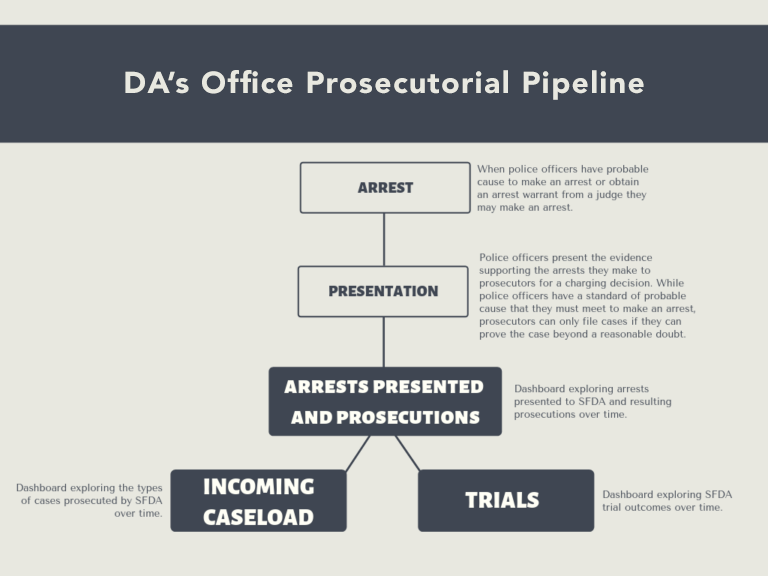

In [580]:
from PIL import Image
pipeline = Image.open("../Images/DA_Pipeline.png");
pipeline

# Let's jump in!

### The Data:
I will be using data from each step of the prosecutorial process. In addition, I will be comparing homicide rates between San Francisco and other similarly sized cities in the US. All data is available in .csv format.

All San Francisco data comes from data.sf.gov

US Homicide data comes from city police websites and the FBI. Sources for each city are recorded in the .csv file

My data includes:

Police Department calls for Service from 2019 - 2021 "calls"

Police Department Incident Reports from 2019 - 2021 "reports"

Arrests Made by the Police presented to the DA from 2019 - 2021 "arrests"

Cases Presented to the DA from 2019 - 2021 "cases"

District Attorney's Trial Outcomes from 2019 - 2021 "trials"

Homicide Data from 38 Largest US cities (population 250,000 or more) 2019/2020 "cities"


# On to the coding!

In [513]:
## Let's import some libraries!
## I'm going to use numpy, pandas, matplotlib, and seaborn
import numpy as np

import pandas as pd

import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-bright')

import seaborn as sns

In [514]:
## Lets check my working directory

%pwd

'/Users/grahamgalloway/Desktop/Digital_Humanities_Project/Notebooks'

In [515]:
## OK, time to import my files with pandas!
calls = pd.read_csv("../Data/Police_Department_Calls_for_Service_2019-2021.csv", sep = ",")

reports = pd.read_csv("../Data/Police_Department_Incident_Reports_2019-2021_Updated.csv", sep = ",")

arrests = pd.read_csv("../Data/Arrests_Presented_and_Prosecutions_2019-2021.csv", sep = ",")

cases = pd.read_csv("../Data/District_Attorney_Incoming_Caseload_2019-2021.csv", sep = ",")

trials = pd.read_csv("../Data/District_Attorney_Trials_2019-2021.csv", sep = ",")

cities = pd.read_csv("../Data/2020_Statistics_Homicides_Majorcities.csv", sep = ",")

from PIL import Image
busted = Image.open("../Images/busted.jpg");
plausible = Image.open("../Images/plausible.jpg")

OK. Let's get a look at how these categories all compare. How many 911 calls end up going to trial? Let's go step by step by analyzing the row count for each file.

In [516]:
# How many times were the police called between Jan 1, 2019 and June 2021?
# Each call is recorded in a row: Here's what the data looks like

reports

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point
0,2019/01/01 12:01:00 AM,2019/01/01,00:01,2019,Tuesday,2021/02/09 02:19:00 PM,100392509027,1003925,210090574,210401927.0,...,False Personation,Open or Active,04TH ST \ MISSION ROCK ST,34169000.0,Out of SF,Mission Bay,6.0,37.772831,-122.391374,POINT (-122.39137353346597 37.77283099431839)
1,2019/01/01 12:01:00 AM,2019/01/01,00:01,2019,Tuesday,2019/06/20 10:10:00 PM,81382074000,813820,190447564,191714130.0,...,Missing Adult,Open or Active,17TH AVE \ PACHECO ST,27312000.0,Taraval,Inner Sunset,7.0,37.750604,-122.474075,POINT (-122.47407526913462 37.7506042958686)
2,2019/01/01 12:01:00 AM,2019/01/01,00:01,2019,Tuesday,2019/03/28 08:00:00 AM,78436868030,784368,190129988,190521281.0,...,Courtesy Report,Unfounded,BOARDMAN PL \ BRYANT ST,23914000.0,Out of SF,South of Market,6.0,37.775161,-122.403636,POINT (-122.40363551943442 37.7751608100771)
3,2019/01/01 12:01:00 AM,2019/01/01,00:01,2019,Tuesday,2019/01/01 11:43:00 AM,75471906372,754719,196000142,NaN,...,"Theft, Other Property, $50-$200",Open or Active,SPEAR ST \ FOLSOM ST,23607000.0,Southern,Financial District/South Beach,6.0,37.790070,-122.390971,POINT (-122.39097101886335 37.79006979947905)
4,2019/01/01 12:01:00 AM,2019/01/01,00:01,2019,Tuesday,2019/02/21 10:30:00 AM,77243768030,772437,190129988,190521281.0,...,Courtesy Report,Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321863,2021/06/29 08:28:00 PM,2021/06/29,20:28,2021,Tuesday,2021/06/29 08:28:00 PM,104501115161,1045011,210408739,211803127.0,...,Violation of Restraining Order,Open or Active,SAN JOSE AVE \ SERGEANT JOHN V YOUNG ST,22101000.0,Ingleside,Outer Mission,11.0,37.724988,-122.443066,POINT (-122.44306587712263 37.72498829635846)
321864,2021/06/29 08:28:00 PM,2021/06/29,20:28,2021,Tuesday,2021/06/29 08:28:00 PM,104501115200,1045011,210408739,211803127.0,...,Domestic Violence (secondary only),Open or Active,SAN JOSE AVE \ SERGEANT JOHN V YOUNG ST,22101000.0,Ingleside,Outer Mission,11.0,37.724988,-122.443066,POINT (-122.44306587712263 37.72498829635846)
321865,2021/06/29 08:30:00 PM,2021/06/29,20:30,2021,Tuesday,2021/06/29 09:46:00 PM,104502772000,1045027,210408864,211803383.0,...,Found Property,Open or Active,LUNADO WAY \ ESTERO AVE,22741000.0,Taraval,West of Twin Peaks,7.0,37.723720,-122.471304,POINT (-122.47130403787814 37.72372006985325)
321866,2021/06/29 08:51:00 PM,2021/06/29,20:51,2021,Tuesday,2021/06/29 08:51:00 PM,104501707041,1045017,210386602,NaN,...,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN


In [517]:
len(calls)

1801541

In [518]:
# Wow, 1,801,541 calls to police. So how many times did the police file an incident report?

len(reports)

321868

In [519]:
(len(reports))/(len(calls))

0.178662600518112

# Only ~17.9% of 911 calls end up as recorded "incidents"

In [581]:
# How many of those police incidents lead to arrests?

len(arrests)

9608

In [521]:
# Rinse, repeat

(len(arrests))/(len(reports))

0.029850746268656716

# Only ~3% of incidents lead to an arrest.

In [522]:
# And now what percent of 911 calls is this?

(len(arrests))/(len(calls))

0.005333211955764537

In [595]:
# Wow, so only ~3% of police incidents where a crime takes place end in an arrest, which is only ~0.5% of 911 calls.
# And how many of those arrests are filed by the DA?

arrestsfiled = arrests[arrests['Status'].str.contains('Filed', na=False)]
len(arrestsfiled)

4880

In [596]:
## What is that as a percentage of total?
len(arrestsfiled)/len(arrests)

0.507910074937552

In [597]:
## And total incidents?
len(arrestsfiled)/len(reports)

0.015161494774255284

## Only ~50% of arrests are prosecuted by the DA. That's ~1.5% of total crimes.

In [593]:
# Let's look at the number of trials

len(trials)

271

In [583]:
# Wow! Only 271. Now what is that as a percentage of arrests that make it to trial?

len(trials)/len(arrests)

0.028205661948376353

# Only ~2.8% of arrests lead to a trial (within the timeframe).

In [525]:
# Ok, so that's really small. Let's look a little closer

trials

,ID,Court Number 1,Court Number 2,Court Number 3,Court Number 4,Case Type,Jury Sworn Date,Trial End Date,Co-Defendant,Trial Length Days,Convicted,Concluded,Trial Outcome,Crime Description
0,1263,18013240,NaN,NaN,NaN,Felony,2019/01/02,2019/01/08,N,6,Convicted,Concluded,Convicted,Robbery 2nd Degre
1,1266,18013592,NaN,NaN,NaN,Misdemeanor,2019/01/04,2019/01/14,N,10,Not Convicted,Not Concluded,Mistrial,Assault-Misdemean
2,1267,17008515,NaN,NaN,NaN,Felony,2019/01/04,2019/01/16,N,12,Convicted,Concluded,Convicted,Assault-Felony
3,1265,18008255,NaN,NaN,NaN,Misdemeanor,2019/01/08,2019/01/14,N,6,Convicted,Concluded,Convicted,Threats
4,1268,16008618,NaN,NaN,NaN,Misdemeanor,2019/01/09,2019/01/16,N,7,Convicted,Concluded,Convicted,DUI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1530,20001414,NaN,NaN,NaN,Felony,2020/10/15,2020/10/28,N,13,Convicted,Concluded,Convicted,Assault-Felony
267,1532,20007148,NaN,NaN,NaN,Felony,2021/01/27,2021/02/24,N,28,NaN,NaN,Convicted,Sexual Assault
268,1533,19016394,NaN,NaN,NaN,Felony,2021/02/23,2021/03/23,N,28,Convicted,Concluded,Convicted,Sexual Assault
269,1534,20008566,NaN,NaN,NaN,Felony,2021/03/17,2021/04/12,N,26,Convicted,Concluded,Convicted,Assault-Felony


In [526]:
# As we can see in the "Trial Outcome" column, only some trials end in convictions. Let's see how many.

trials.value_counts("Trial Outcome")

Trial Outcome
Convicted        185
Not Convicted     45
Mistrial          41
dtype: int64

In [586]:
# How long do trials take?

trials.value_counts("Trial Length Days")

Trial Length Days
7      33
6      30
5      23
8      20
3      17
4      17
10     14
2      13
9      13
11      7
12      7
22      7
14      7
13      6
1       5
19      5
18      5
15      4
29      4
26      4
17      3
20      3
21      3
28      3
66      2
39      2
35      2
0       2
27      2
16      2
30      1
33      1
34      1
24      1
183     1
367     1
dtype: int64

In [587]:
# Anywhere from 0 days to over a year. Just out of curiosity's sake, how long is the average trial?

trials['Trial Length Days'] = trials['Trial Length Days'].astype(int)

trials["Trial Length Days"].mean()

12.339483394833948

So, between Jan 1, 2019 and June 2021, over 1,800,000 calls to 911 end up with only 185 convictions. 

In [528]:
## What percentage of 9/11 calls in SF end with a conviction?

185/len(calls)

0.00010268986384434215

In [588]:
# And what about incidents?

185/len(reports)

0.0005747697814010713

# Only .01% of calls to 911 and .06% of police incidents end with a criminal conviction. 

Ok, now that that's out of the way, lets get into testing the recall campaign's claims.

# Claim 1: Crime has increased under Boudin

This is from a data set that includes one year before Boudin took office and the year and a half since. Let's compare those years. For simplicity's sake I'm going to include the 8 days of 2020 before Boudin took office as part of his tenure.

In [529]:
#first I'm going to split my datasets by year

import datetime as dt

calls['Report Date'] = pd.to_datetime(calls['Report Date'])

calls2019 = calls[calls['Report Date'].dt.year == 2019]
calls2020 = calls[calls['Report Date'].dt.year == 2020]
calls2021 = calls[calls['Report Date'].dt.year == 2021]

In [530]:
reports['Incident Date'] = pd.to_datetime(reports['Incident Date'])

reports2019 = reports[reports['Incident Date'].dt.year == 2019]
reports2020 = reports[reports['Incident Date'].dt.year == 2020]
reports2021 = reports[reports['Incident Date'].dt.year == 2021]

In [531]:
arrests["Arrest Date"] = pd.to_datetime(arrests["Arrest Date"])

arrests2019 = arrests[arrests["Arrest Date"].dt.year == 2019]
arrests2020 = arrests[arrests["Arrest Date"].dt.year == 2020]
arrests2021 = arrests[arrests["Arrest Date"].dt.year == 2021]

In [532]:
cases["Arrest Date"] = pd.to_datetime(cases["Arrest Date"])

cases2019 = cases[cases["Arrest Date"].dt.year == 2019]
cases2020 = cases[cases["Arrest Date"].dt.year == 2020]
cases2021 = cases[cases["Arrest Date"].dt.year == 2021]

In [533]:
trials["Jury Sworn Date"] = pd.to_datetime(trials["Jury Sworn Date"])

trials2019 = trials[trials["Jury Sworn Date"].dt.year == 2019]
trials2020 = trials[trials["Jury Sworn Date"].dt.year == 2020]
trials2021 = trials[trials["Jury Sworn Date"].dt.year == 2021]

Ok. Now we have all our datasets split up by year. Lets compare!
# Lets graph!

Here we can see 911 calls over time. Calls are steady in 2019, but drop off pretty significantly in March, coinciding with the start of lockdown.

<AxesSubplot:xlabel='Report Date'>

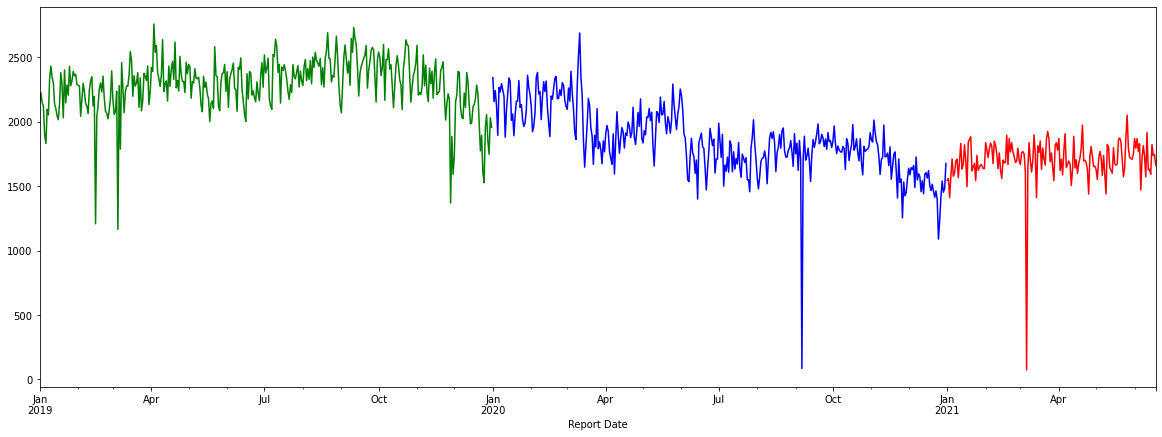

In [534]:
calls2019.groupby(calls2019['Report Date']).size().plot(figsize = (20,7), color = ('green'))
calls2020.groupby(calls2020['Report Date']).size().plot(figsize = (20,7), color = ('blue'))
calls2021.groupby(calls2021['Report Date']).size().plot(figsize = (20,7), color = ('red'))

# Police Incident Reports

Here wer see a similar trend. Incident reports remain steady through 2019 and into 2021, dropping sharply in april. Despite 911 calls decreasing consistently through 2020, police incident reports start to increase before leveling off

<AxesSubplot:xlabel='Incident Date'>

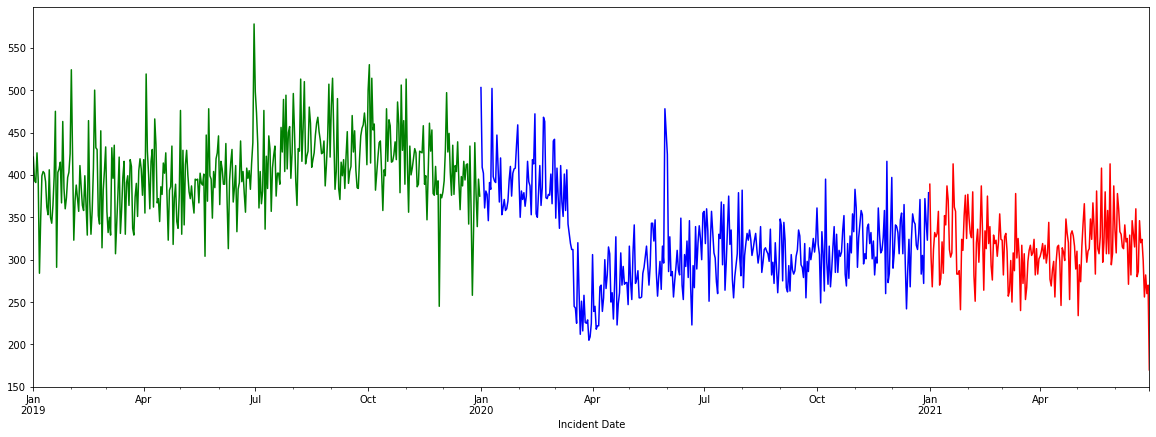

In [535]:
reports2019.groupby(reports2019['Incident Date']).size().plot(figsize = (20,7), color = ('green'))
reports2020.groupby(reports2020['Incident Date']).size().plot(figsize = (20,7), color = ('blue'))
reports2021.groupby(reports2021['Incident Date']).size().plot(figsize = (20,7), color = ('red'))

# Arrests

Ok, this graph is pretty jagged because of the daily data, but it's pretty clear that arrests have decreased consistently since the start of 2020.

<AxesSubplot:xlabel='Arrest Date'>

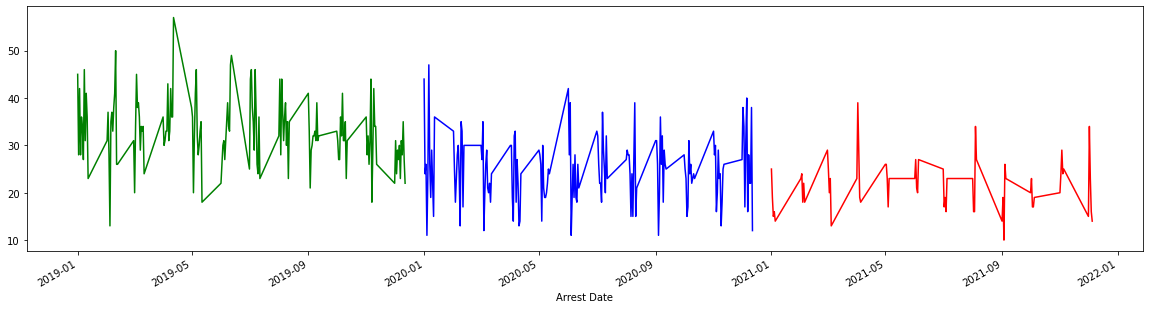

In [536]:

arrests2019.groupby(arrests2019['Arrest Date']).size().plot(figsize = (20,5), color = ('green'))
arrests2020.groupby(arrests2020['Arrest Date']).size().plot(figsize = (20,5), color = ('blue'))
arrests2021.groupby(arrests2021['Arrest Date']).size().plot(figsize = (20,5), color = ('red'))

# Trials 

Ok, there's so little data here to work with, but it looks like trials stopped almost completely when COVID hit, shortly after Boudin took office.

<AxesSubplot:xlabel='Jury Sworn Date'>

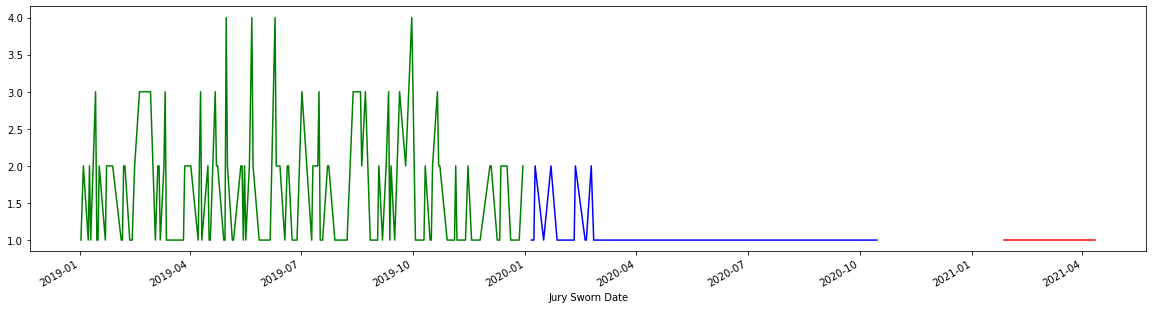

In [537]:
trials2019.groupby(trials2019['Jury Sworn Date']).size().plot(figsize = (20,5), color = ('green'))
trials2020.groupby(trials2020['Jury Sworn Date']).size().plot(figsize = (20,5), color = ('blue'))
trials2021.groupby(trials2021['Jury Sworn Date']).size().plot(figsize = (20,5), color = ('red'))

In [538]:
len(trials2019)

238

In [539]:
len(trials2020)

29

In [540]:
(len(trials2020))/len(trials2019)

0.12184873949579832

Looks like trials in 2020 were only 12% of the trials in 2019. 

# Types of Crime

Not all crimes are equal. Violent crime is much more frightening than property crime. Felonies are worse than misdemeanors. Lets look at how different crimes compare over time.

Here I'm going to look  at arrests for Felonies vs Misdemeanors

In [541]:
arrestsf = arrests[arrests['Case Type'].str.contains("Felony")]
arrestsm = arrests[arrests['Case Type'].str.contains("Misdemeanor")]

<AxesSubplot:xlabel='Arrest Date'>

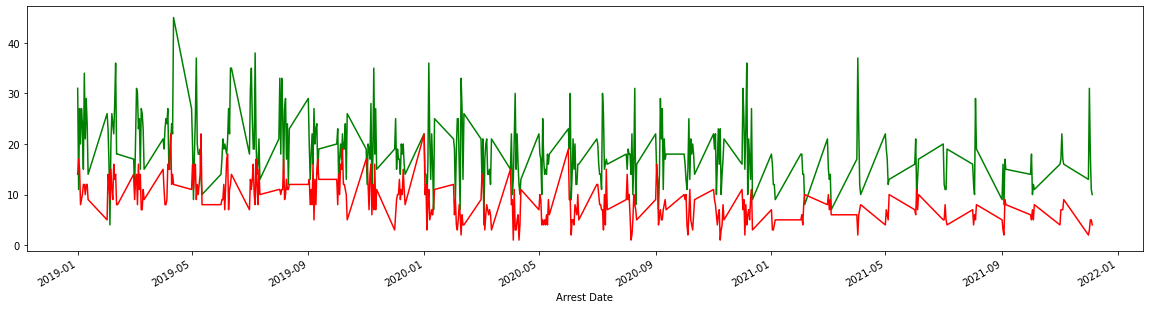

In [542]:
arrestsf.groupby(arrestsf['Arrest Date']).size().plot(figsize = (20,5), color = ('green'))
arrestsm.groupby(arrestsm['Arrest Date']).size().plot(figsize = (20,5), color = ('red'))

Well, looks like both felony and misdemeanor arrests declined slightly since the beginning of 2020. Fewer arrests were made for misdemeanors than felonies. 

Lets look at property vs nonviolent crime.

Here are the different categories for crime and the amounts of each. Lets split our police reports up into violent vs nonviolent crime. I will not be including more minor "victimless" crimes such as "Non-Criminal", "Lost Property", "Drug Offenses", etc.

In [543]:
reports.value_counts("Incident Category")

Incident Category
Larceny Theft                                 94163
Other Miscellaneous                           23131
Malicious Mischief                            22322
Burglary                                      19571
Non-Criminal                                  19523
Assault                                       19361
Motor Vehicle Theft                           16688
Recovered Vehicle                             12856
Warrant                                        9955
Fraud                                          9519
Lost Property                                  8916
Robbery                                        7469
Drug Offense                                   7422
Missing Person                                 6943
Suspicious Occ                                 6648
Disorderly Conduct                             5514
Offences Against The Family And Children       4554
Traffic Violation Arrest                       3459
Miscellaneous Investigation                   

Lets split them into two new dataframes

In [544]:
reportsproperty = reports[reports['Incident Category'].str.contains('Theft|Burglary|Stolen|Fraud', na=False)]
reportsviolent = reports[reports['Incident Category'].str.contains('Assault|Robbery|Arson|Sex|Rape|Homicide', na=False)]

And lets graph a timeline!

<AxesSubplot:xlabel='Incident Date'>

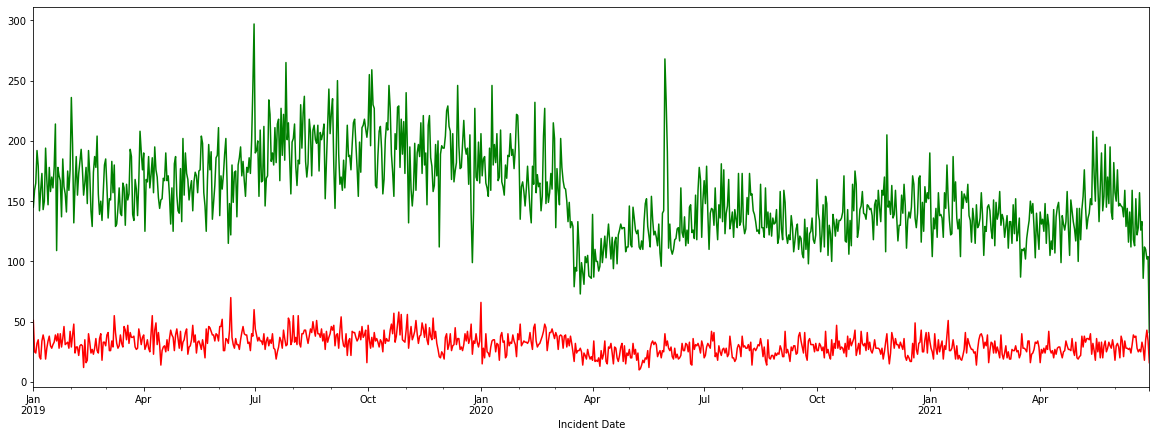

In [545]:
reportsproperty.groupby(reportsproperty['Incident Date']).size().plot(figsize = (20,7), color = ('green'))
reportsviolent.groupby(reportsviolent['Incident Date']).size().plot(figsize = (20,7), color = ('red'))

# All Crime has decreased.

Well, it looks like contrary to the Recall Chesa Boudin team, both violent and property crime have dropped since the start of 2020. Both have stayed consistently lower. Lets take a better look at violent crime

<AxesSubplot:xlabel='Incident Date'>

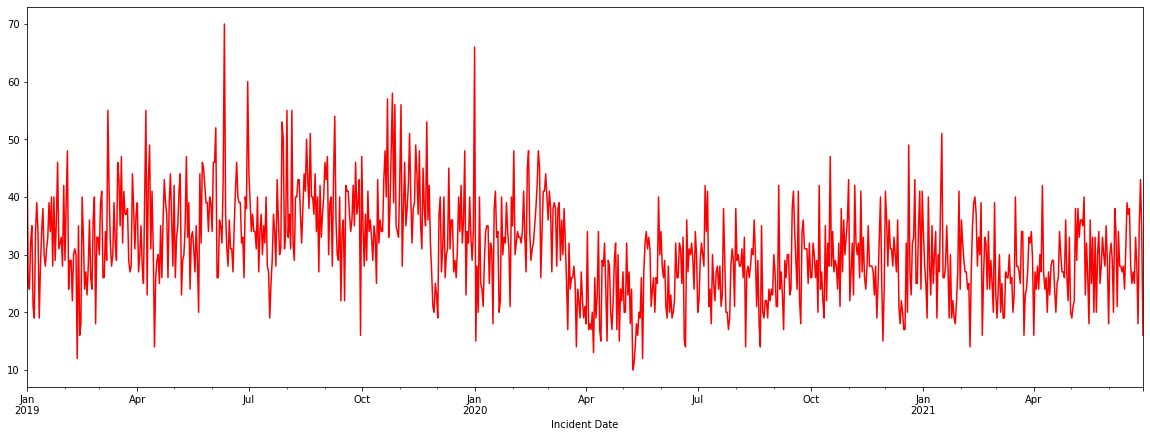

In [546]:
reportsviolent.groupby(reportsviolent['Incident Date']).size().plot(figsize = (20,7), color = ('red'))

The change is pretty clear, though it does seem we are creeping back up to 2019 levels.

Here you can see the decrease much more clearly. Lets look at the raw numbers.

In [547]:
# Lets split police reports by year again, but this time for violent vs property

reportsviolent2019 = reportsviolent[reportsviolent['Incident Date'].dt.year == 2019]
reportsviolent2020 = reportsviolent[reportsviolent['Incident Date'].dt.year == 2020]
reportsviolent2021 = reportsviolent[reportsviolent['Incident Date'].dt.year == 2021]

In [548]:
# How many violent crimes total for 2019?

len(reportsviolent2019)

12909

In [549]:
# And What about 2020?

len(reportsviolent2020)

10331

In [550]:
# And 2021 so far?

len(reportsviolent2021)

5071

# There were more than 2,000 fewer violent crimes in 2020. 

So far we are 6 months into 2021 and not yet at 50% of the number of violent crimes as 2019 as well. Looks like violent crim has NOT increased since Boudin took office.

In [551]:
(len(reportsviolent2020))/(len(reportsviolent2019))

0.8002943682701991

# Violent crime rates for 2020 were 80% of violent crime rates for 2019.

Lets look at property crime.

In [552]:
reportsproperty2019 = reportsproperty[reportsproperty['Incident Date'].dt.year == 2019]
reportsproperty2020 = reportsproperty[reportsproperty['Incident Date'].dt.year == 2020]
reportsproperty2021 = reportsproperty[reportsproperty['Incident Date'].dt.year == 2021]

In [553]:
len(reportsproperty2019)

65723

In [554]:
len(reportsproperty2020)

51376

In [555]:
len(reportsproperty2021)

24592

Property crime has also decreased! And again we are not at 50 percent of 2019 crime levels despite being halfway through the year.

In [556]:
(len(reportsproperty2020))/(len(reportsproperty2019))

0.7817050347671287

# Property crime for 2020 is only 78% of what it was for 2019

# Claim 1: BUSTED

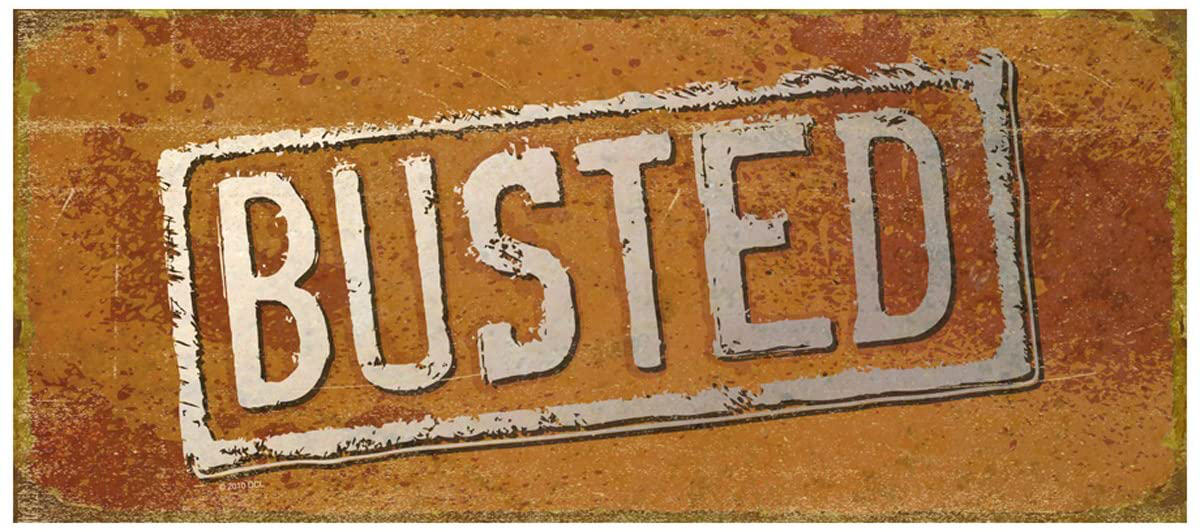

In [557]:
busted

Crime has NOT increased since Boudin has taken office. In fact, both violent and property crime FELL since he took office.

# Claim 2: Boudin does not prosecute crime

Now on to claim number 2 about Boudin not pursuing charges. We saw that there were fewer trials, but is that the whole picture? We need to look at the outcomes of arrests presented to the DA.

In [558]:
# The arrests file contains data information as to whether charges were dismissed or filed.
# Lets look at it by year, just like the other categories

arrests2019filed = arrests2019[arrests2019['Status'].str.contains('Filed', na=False)]
arrests2020filed = arrests2020[arrests2020['Status'].str.contains('Filed', na=False)]
arrests2021filed = arrests2021[arrests2021['Status'].str.contains('Filed', na=False)]

In [559]:
# Lets compare total arrests for 2019 and 2020 again
len(arrests2019)

4737

In [560]:
len(arrests2020)

3578

In [561]:
(len(arrests2020))/(len(arrests2019))

0.755330377876293

So 2020 had 75.5% of arrests presented to the DA compared to 2019. Now lets compare filing percentage for each year

In [562]:
len(arrests2019filed)/len(arrests2019)

0.5214270635423264

In [563]:
len(arrests2020filed)/len(arrests2020)

0.4762437115707099

In [564]:
len(arrests2021filed)/len(arrests2021)

0.5460170146945089

## The DA's filing rate for 2019 was ~52.1%

## In 2020 it was ~47.6%, or about 4.5% lower than 2020

In 2021 so far, however, the rate increased to ~54.6%, an increase of ~7% since 2020 and higher than 2019.

Lets compare felonies to misdemeanors. This might get a bit messy with the variables.

In [565]:
arrests2019f = arrests2019[arrests2019['Case Type'].str.contains('Felony', na=False)]
arrests2020f = arrests2020[arrests2020['Case Type'].str.contains('Felony', na=False)]
arrests2021f = arrests2021[arrests2021['Case Type'].str.contains('Felony', na=False)]

arrests2019filedf = arrests2019filed[arrests2019filed['Case Type'].str.contains('Felony', na=False)]
arrests2020filedf = arrests2020filed[arrests2020filed['Case Type'].str.contains('Felony', na=False)]
arrests2021filedf = arrests2021filed[arrests2021filed['Case Type'].str.contains('Felony', na=False)]

In [566]:
arrests2019m = arrests2019[arrests2019['Case Type'].str.contains('Misdemeanor', na=False)]
arrests2020m = arrests2020[arrests2020['Case Type'].str.contains('Misdemeanor', na=False)]
arrests2021m = arrests2021[arrests2021['Case Type'].str.contains('Misdemeanor', na=False)]

arrests2019filedm = arrests2019filed[arrests2019filed['Case Type'].str.contains('Misdemeanor', na=False)]
arrests2020filedm = arrests2020filed[arrests2020filed['Case Type'].str.contains('Misdemeanor', na=False)]
arrests2021filedm = arrests2021filed[arrests2021filed['Case Type'].str.contains('Misdemeanor', na=False)]

In [567]:
# What percentage of felonies were prosecuted in 2019?

len(arrests2019filedf)/len(arrests2019f)

0.5689092096668844

In [568]:
# And 2020?

len(arrests2020filedf)/len(arrests2020f)

0.490987460815047

In [569]:
# What about 2021?

len(arrests2021filedf)/len(arrests2021f)

0.5808189655172413

## The felony filing rate was ~56.9% for 2019, ~49.1% for 2020, and ~58.1% so far for 2021.

Again, we see the rate go down for 2020, but back up again for 2021. How about misdemeanors?

In [570]:
len(arrests2019filedm)/len(arrests2019m)

0.43462686567164177

In [571]:
len(arrests2020filedm)/len(arrests2020m)

0.4395711500974659

In [572]:
len(arrests2021filedm)/len(arrests2021m)

0.4575342465753425

Hmmmmm. Looks like the rate for prosecuting misdemeanors actually increases for each year.

This data is less conclusive. For 2020 it's pretty clear that Boudin pursued a smaller percentage of cases than his predecessor and 2021 isn't over, so I'm going to leave this one open.

# Claim 2: PLAUSIBLE

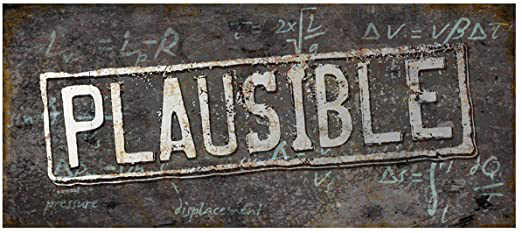

In [573]:
plausible

Now on to the 3rd and final claim! How does San Francisco compare to other cities? For this category I decided to limit my scope to strictly homicides, because I didn't want to spend all my life parsing through other cities' police data and homicide information was easily available.

Lets take a look

In [574]:
cities

,City,2020,2019,Source
0,Tucson,65,47,https://qlikapps.tucsonaz.gov/sense/app/be0461...
1,Washington,197,165,http://mpdc.dc.gov/page/district-crime-data-gl...
2,New Orleans,194,120,https://council.nola.gov/committees/criminal-j...
3,Virginia Beach,9,15,https://eprodmz.vbgov.com/MainUI/Crimes/CrimeS...
4,Kansas City,174,151,http://kcpd.org/crime/crime-statistics/
5,St Louis,261,194,http://www.slmpd.org/crime_stats.shtml
6,Dallas,245,199,http://www.dallaspolice.net/resources/CrimeRep...
7,Philadelphia,469,346,https://drive.google.com/drive/folders/1eo4BIO...
8,Boston,57,37,https://bpdnews.com/?category=Crime+Stats
9,Oakland,102,74,https://www.oaklandca.gov/services/police-depa...


<AxesSubplot:xlabel='City', ylabel='2020'>

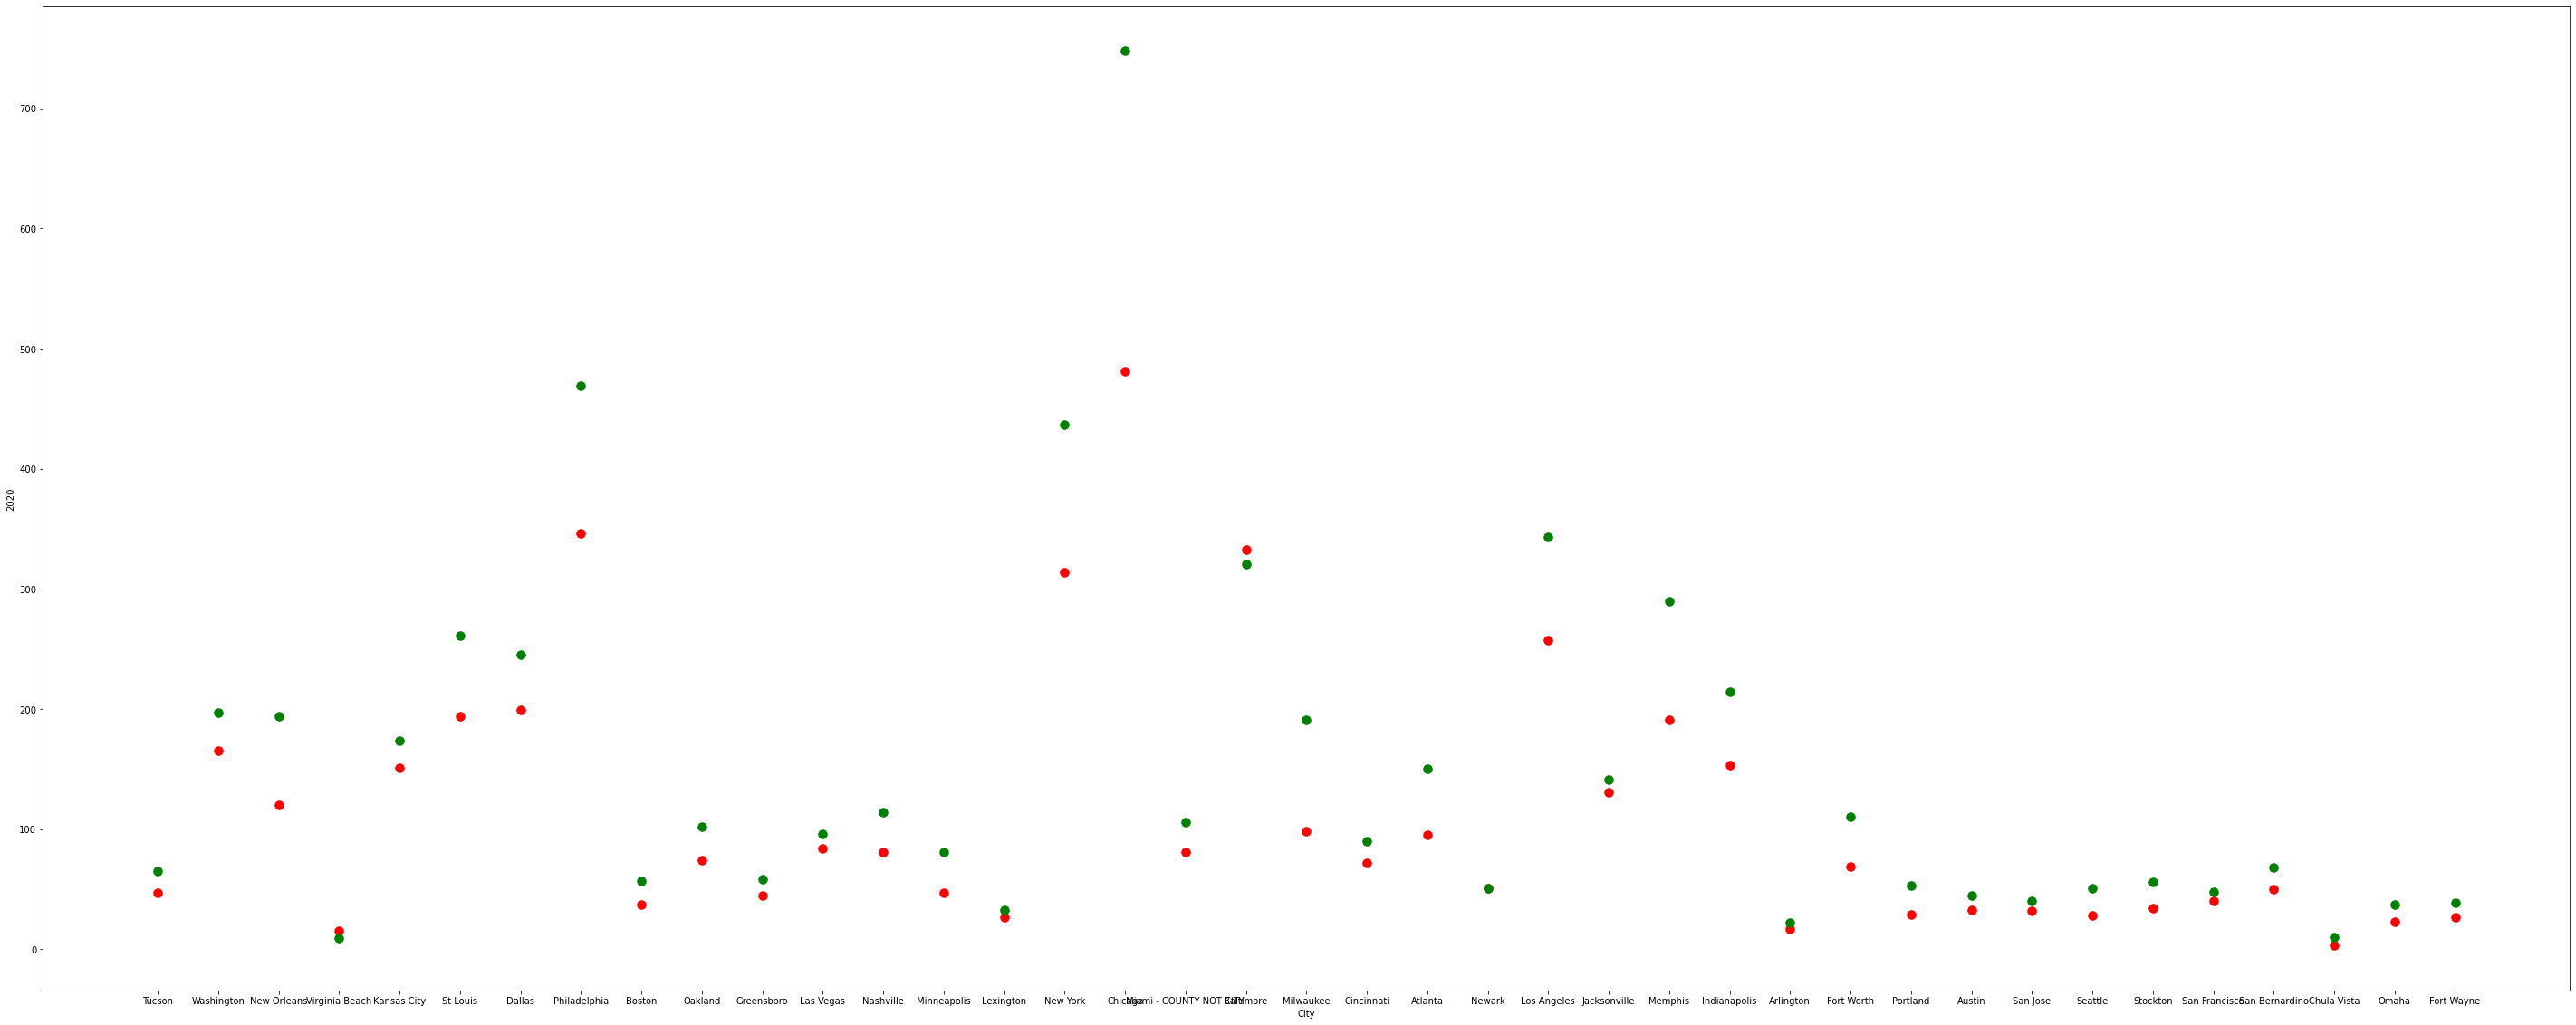

In [575]:
ax = plt.gca()

cities.plot(kind='scatter',x='City',y='2019', color='red', ax=ax, s = 90, figsize = (50,20))
cities.plot(kind='scatter',x='City',y='2020',color = 'green', ax=ax, s = 90, figsize = (50,20))

Ok, I know that's hard to see, but the green represents homicides in 2020 and the red represents homicides in 2019.

Accross the board homicides are up in 2020.

Lets look at the comparison between 2020's averages and 2019's

In [576]:
cities["2020"].mean()/cities["2019"].mean()

1.3607861488067385

Ok, the 38 largest cities in the US averaged 36% more homicides in 2020 compared to 2019. What about SF?

In [577]:
48/40

1.2

In [599]:
48/cities["2020"].mean()

0.3218707015130674

## San Francisco had 20% more homicides in 2020 compared to 2019.
## The average change for the 39 largest cities in the US was a 36.1% increase in homicides.
## Numbers of homicides in San Francisco for 2020 were 32% the average for large cities.

NOTE: This average does NOT take in account homicides per capita. Only total homicides.

While that is a large increase for San Francisco, it's actually lower than the average for large cities in America. Therefore, we can conclude that San Francisco is NOT becoming more deadly than other cities.

# Claim 3: BUSTED

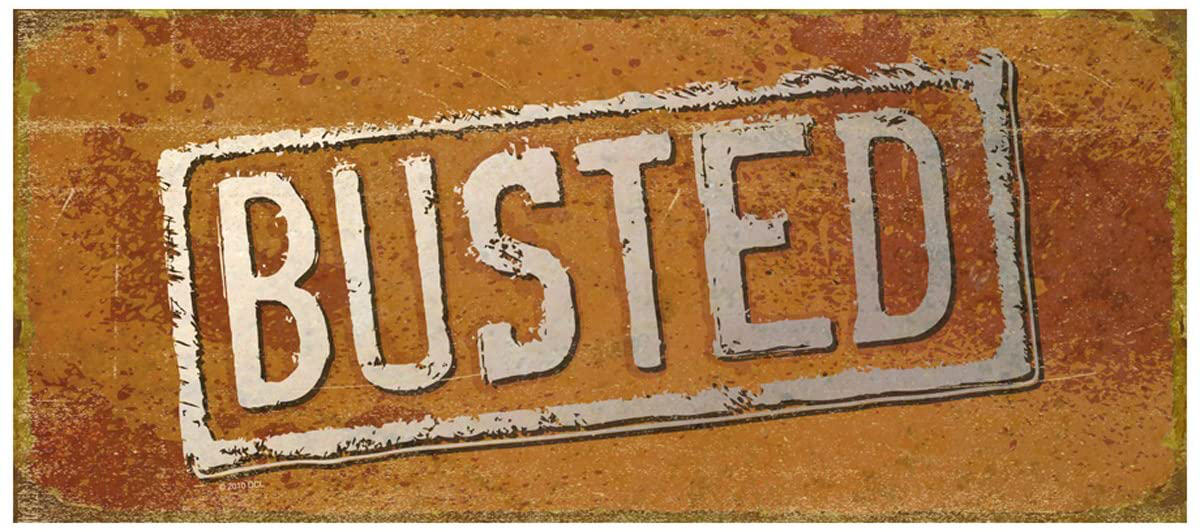

In [578]:
busted

# Conclusion:
# The Recall Chesa Boudin Campaign's claims are not supported by the data.

I don't have the capacity to get into deeper discussions about crime in this project, but the data clearly shows that the three main claims of the recall campaign are unfounded. 

Crime is an incredibly complicated subject and determining the causes of crime rates is incredibly difficult and beyond the scope of this class. I don't want to attribute any sort of causation to my data, but merely want to check the data behind the claims. I can't make any conclusions as to why certain crime tends take place, but I can plot them. It's clear that since Boudin took office at the start of 2020, compared with 2019 both violent and property crimes decreased, similar amounts of cases are filed, and San Francisco's homicide rate has increased, but at a lower rate than similar cities.

I believe it's too simple to blame one figure on complicated crime trends. It's likely that the COVID pandemic and financial crisis played the main roles in the trends shown, but that's not for me to conclude at this time. Further research can use this data to look at further correlations with other factors and to take a stab at causation.